In [4]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_trial_data = pd.merge(mouse_drug_data, clinical_trial_data, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview

mouse_trial_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

means_grouped = mouse_trial_data.groupby(["Drug","Timepoint"], as_index=True).mean()
means = means_grouped.iloc[:,1]
data_filter = means_grouped.loc[['Capomulin','Infubinol', 'Ketapril', 'Placebo']]
data_filter = data_filter.reset_index()

# Convert to DataFrame
tumor_volume_mean_df = data_filter.iloc[:,0:3]

# # Preview DataFrame
tumor_volume_mean_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

sems = mouse_trial_data.groupby(["Drug","Timepoint"]).sem()['Tumor Volume (mm3)']

# # # Convert to DataFrame

data_filter2 = sems.loc[['Capomulin','Infubinol', 'Ketapril', 'Placebo']]
sems_df = data_filter2.reset_index()

# # # Preview DataFrame
sems_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [7]:
# Minor Data Munging to Re-Format the Data Frames
tumor_volume_mean_df_format = tumor_volume_mean_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

sems_df_format = sems_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
tumor_volume_mean_df_format



Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [8]:
# Preview that Reformatting worked
sems_df_format

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


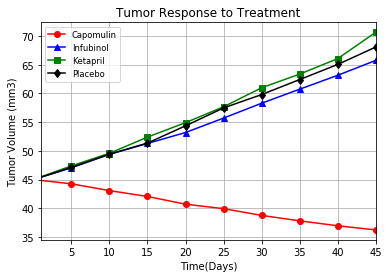

In [10]:
# Generate the Plot (with Error Bars)

timepoint = tumor_volume_mean_df_format.index

capomulin = tumor_volume_mean_df_format.loc[:,["Capomulin"]]
infubinol = tumor_volume_mean_df_format.loc[:,["Infubinol"]]
ketapril = tumor_volume_mean_df_format.loc[:,["Ketapril"]] 
placebo = tumor_volume_mean_df_format.loc[:,["Placebo"]]

capomulin_err = sems_df_format.loc[:,["Capomulin"]]
infubinol_err = sems_df_format.loc[:,["Infubinol"]]
ketapril_err = sems_df_format.loc[:,["Ketapril"]] 
placebo_err = sems_df_format.loc[:,["Placebo"]]

fig, ax = plt.subplots()

capomulin_handle, = plt.plot(timepoint, capomulin, marker ='o', color='red', label="Capomulin")
infubinol_handle, = plt.plot(timepoint, infubinol, marker ='^', color='blue', label="Infubinol")
ketapril_handle, = plt.plot(timepoint, ketapril, marker ='s', color='green', label="Ketapril")                                                            
placebo_handle, = plt.plot(timepoint, placebo, marker ='d', color='black', label="Placebo")                                                            
                                                            

plt.xlim(1, 45)
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")
plt.grid(axis='both')

plt.legend(handles=[capomulin_handle,infubinol_handle,ketapril_handle,placebo_handle],loc="best", fontsize="small", fancybox=True)



# # Save the Figure
plt.savefig("../PymaceuticalsHW/tumor_response_chart.png")


In [11]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [12]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

met_mean = means_grouped.groupby(["Drug","Timepoint"]).mean()

# Convert to DataFrame
met_mean_df = pd.DataFrame(met_mean['Metastatic Sites'])
data_filtermet = met_mean_df.loc[['Capomulin','Infubinol', 'Ketapril', 'Placebo']]
met_mean_df = data_filtermet.reset_index()

# Preview DataFrame
met_mean_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [13]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sems_meta = mouse_trial_data.groupby(["Drug","Timepoint"]).sem()['Metastatic Sites']

# Convert to DataFrame
data_filter3 = sems_meta.loc[['Capomulin','Infubinol', 'Ketapril', 'Placebo']]
sems_meta_df = data_filter3.reset_index()

# Preview DataFrame
sems_meta_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [14]:
# Minor Data Munging to Re-Format the Data Frames
met_mean_df_format = met_mean_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

sems_meta_df_format = sems_meta_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked

met_mean_df_format

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


In [15]:
# Preview that Reformatting worked
sems_meta_df_format

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


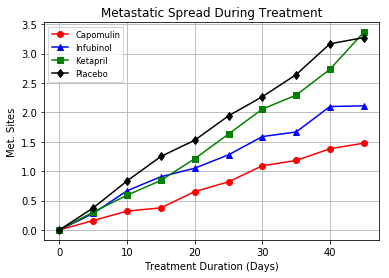

In [16]:
# Generate the Plot (with Error Bars)

timepoint1 = met_mean_df_format.index

cap = met_mean_df_format.loc[:,["Capomulin"]]
inf = met_mean_df_format.loc[:,["Infubinol"]]
ket = met_mean_df_format.loc[:,["Ketapril"]] 
plac = met_mean_df_format.loc[:,["Placebo"]]

cap_handle, = plt.plot(timepoint1, cap, marker ='o', color='red', label="Capomulin")
inf_handle, = plt.plot(timepoint1, inf, marker ='^', color='blue', label="Infubinol")
ket_handle, = plt.plot(timepoint1, ket, marker ='s', color='green', label="Ketapril")                                                            
plac_handle, = plt.plot(timepoint1, plac, marker ='d', color='black', label="Placebo")                                                            


plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.grid(axis='both')
plt.legend(handles=[cap_handle,inf_handle,ket_handle,plac_handle],loc="best", fontsize="small", fancybox=True)


# This is my attempt to add error bars that did not work because of a TypeError: unsupported operand type(s) for -: 'str' and 'str':
# cap_err = sems_meta_df_format.loc[:,["Capomulin"]]
# inf_err = sems_meta_df_format.loc[:,["Infubinol"]]
# ket_err = sems_meta_df_format.loc[:,["Ketapril"]] 
# plac_err = sems_meta_df_format.loc[:,["Placebo"]]
                                  
# fig, ax = plt.subplots()
                                  
# ax.errorbar(x_axis, cap, yerr=cap_err, marker ='o', color='red', label="Capomulin")
# ax.errorbar(x_axis, cap, yerr=cap_err, marker ='^', color='blue', label="Infubinol")
# ax.errorbar(x_axis, cap, yerr=cap_err, marker ='s', color='green', label="Ketapril")                                                            
# ax.errorbar(x_axis, cap, yerr=cap_err, marker ='d', color='black', label="Placebo")       



# Save the Figure
plt.savefig("../PymaceuticalsHW/met_spread_chart.png")
# Show the Figure
plt.show()

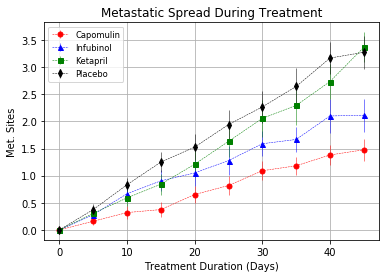

## Survival Rates

In [17]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = mouse_trial_data.groupby(["Drug","Timepoint"], as_index=True).count()['Mouse ID']

# Convert to DataFrame
mouse_count = pd.DataFrame(mouse_count.loc[['Capomulin','Infubinol', 'Ketapril', 'Placebo']])
mouse_count = mouse_count.rename(columns={'Mouse ID':'Mouse Count'})
mouse_count = mouse_count.reset_index()

# Preview DataFrame
mouse_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [18]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_format = mouse_count.pivot(index='Timepoint', columns='Drug', values='Mouse Count')
# Preview the Data Frame
mouse_count_format

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


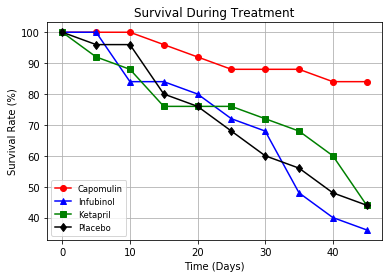

In [19]:
# Generate the Plot (Accounting for percentages)
percent = mouse_count_format.iloc[:,0:].apply(lambda x:100 * x / float(x.max()))


capsr_handle, = plt.plot(mouse_count_format.index, percent.iloc[:,0], marker ='o', color='red', label="Capomulin")
infsr_handle, = plt.plot(mouse_count_format.index, percent.iloc[:,1], marker ='^', color='blue', label="Infubinol")
ketsr_handle, = plt.plot(mouse_count_format.index, percent.iloc[:,2], marker ='s', color='green', label="Ketapril")                                                            
placsr_handle, = plt.plot(mouse_count_format.index, percent.iloc[:,3], marker ='d', color='black', label="Placebo")                                                            

# mouse_count_format.plot(title="Survival During Treatment",grid=True)
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid(axis='both')

plt.legend(handles=[capsr_handle,infsr_handle,ketsr_handle,placsr_handle],loc="best", fontsize="small", fancybox=True)

# Show the Figure
plt.show()

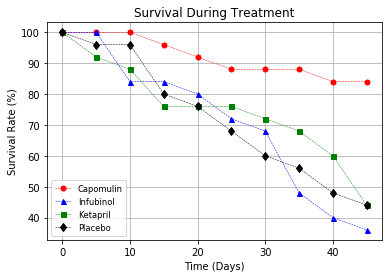

## Summary Bar Graph

In [20]:
# Calculate the percent changes for each drug
percents = (tumor_volume_mean_df_format.iloc[-1]-tumor_volume_mean_df_format.iloc[0])/(tumor_volume_mean_df_format.iloc[0])*100

# Display the data to confirm
percents

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

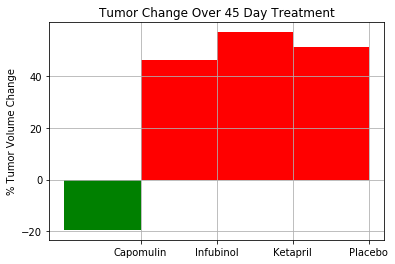

In [21]:
# Store all Relevant Percent Changes into a Tuple
drugs = ('Capomulin','Infubinol','Ketapril','Placebo')
percents = pd.Series(percents)

# Splice the data between passing and failing drugs

# Orient widths. Add labels, tick marks, etc. 
xlabels = drugs

plt.bar(drugs, percents, width = -1, align = 'edge',
       color = ['red' if percents[i] > 0 else 'green' for i in np.arange(len(xlabels))])
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.grid(axis='both')
plt.yticks(np.arange(-20, 60, step=20))

# Use functions to label the percentages of changes


# Call functions to implement the function calls

# Save the Figure
plt.savefig("../PymaceuticalsHW/tumor_change_chart.png")

# Show the Figure
plt.show()

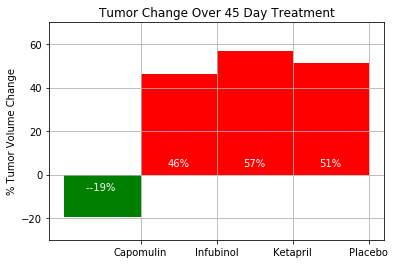